<a href="https://colab.research.google.com/github/yadavrahyl2k15/Multiple-Linear-Regression/blob/master/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
data=pd.read_excel("/content/Book 3 (1).xlsx")
data.head()

,Scalessold,MonthsEmployed
0,275,41
1,296,106
2,317,76
3,376,104
4,162,22


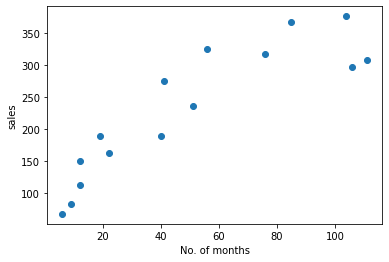

In [ ]:
plt.figure()
plt.scatter(data['MonthsEmployed'],data['Scalessold'])
plt.xlabel("No. of months")
plt.ylabel("sales")
plt.show()

scatter plot is showing that there is positive relationship between months and sales 

In [ ]:
x=data['MonthsEmployed']
y=data['Scalessold']
x1=sm.add_constant(x)
model=sm.OLS(y,x1)
Model=model.fit()
print(Model.summary())

                            OLS Regression Results                            
Dep. Variable:             Scalessold   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     46.41
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           1.24e-05
Time:                        19:08:22   Log-Likelihood:                -78.745
No. Observations:                  15   AIC:                             161.5
Df Residuals:                      13   BIC:                             162.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            111.2279     21.628      5.

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


from summary we found that model is good but when we draw residual plot to show its behaviour and finds model is good or bad

In [ ]:
e=Model.resid_pearson

In [ ]:
e

array([ 1.33945744, -1.35645713,  0.50765989,  0.35518943, -0.03063607,
        0.20702037,  1.08543558, -1.35411191, -0.34936157,  0.05163116,
       -1.00208207, -0.56041143, -1.18121025,  1.62923113,  0.65864542])

In [ ]:
yhat=Model.predict(x1)

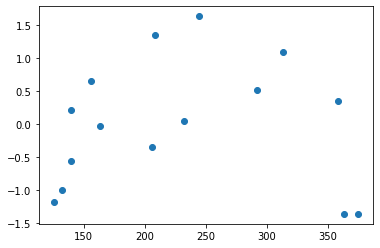

In [ ]:
plt.scatter(yhat,e)

there is curvelinear relation not a rectangular between residual and yhat.so we have to square independem=nt variable and we have now 2 independent variable.

In [ ]:
x_sq=x**2

In [ ]:
x_new=np.column_stack((x,x_sq))
y=data['Scalessold']
x2=sm.add_constant(x_new)
model=sm.OLS(y,x2)
Model=model.fit()
Model.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Scalessold   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     55.36
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           8.75e-07
Time:                        19:14:28   Log-Likelihood:                -72.704
No. Observations:                  15   AIC:                             151.4
Df Residuals:                      12   BIC:                             153.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.3476     22.775      1.991      0.070      -4.274      94.969
x1             6.3448      1.058      5.998      0.000       4.040       8.650
x2            -0.0345      0.009     -3.854      0.002      -0.054      -0.015
==============================================================================
Omnibus:                        2.162   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                1.003
Skew:                          -0.126   Prob(JB):                        0.606
Kurtosis:                       1.758   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
e1=Model.resid_pearson

In [ ]:
yhat=Model.predict(x2)

Text(0.5, 1.0, 'Residual plot')

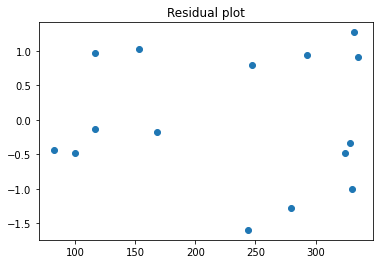

In [ ]:
plt.scatter(yhat,e1)
plt.title("Residual plot")

it is rectangular curve so model is good.


# REGRESSION ANALYSIS INTERACTION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [ ]:
df=pd.read_excel("/content/Book 3 (2).xlsx")
df

,PRICE,EXPENDITURE,SALES
0,2.0,50,478
1,2.5,50,373
2,3.0,50,335
3,2.0,50,473
4,2.5,50,358
5,3.0,50,329
6,2.0,50,456
7,2.5,50,360
8,3.0,50,322
9,2.0,50,437


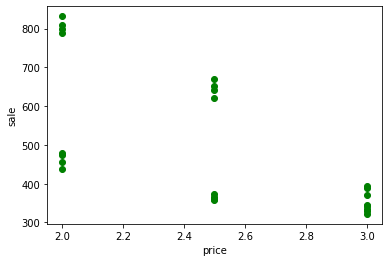

In [ ]:
plt.figure()
plt.scatter(df['PRICE'],df['SALES'],color='green')
plt.ylabel('sale')
plt.xlabel("price")
plt.show()

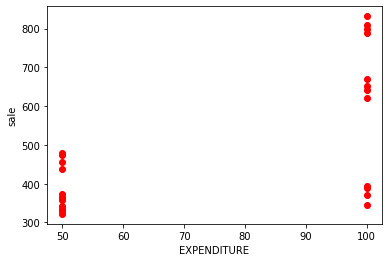

In [ ]:
plt.figure()
plt.scatter(df['EXPENDITURE'],df['SALES'],color='red')
plt.ylabel('sale')
plt.xlabel("EXPENDITURE")
plt.show()

since there are two independent variables for 1 dependendet variable.so 
y=z1x1+z2x2+z3x1x2

In [ ]:
z1=df['EXPENDITURE']
z2=df['PRICE']
z3=z1*z2

In [ ]:
x_new=np.column_stack((z1,z2,z3))
y=df['SALES']
x=sm.add_constant(x_new)
model=sm.OLS(y,x)
Model=model.fit()
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SALES   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     297.9
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           9.26e-17
Time:                        19:44:20   Log-Likelihood:                -111.99
No. Observations:                  24   AIC:                             232.0
Df Residuals:                      20   BIC:                             236.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -275.8333    112.842     -2.444      0.024    -511.218     -40.449
x1            19.6800      1.427     13.788      0.000      16.703      22.657
x2           175.0000     44.547      3.928      0.001      82.077     267.923
x3            -6.0800      0.563    -10.790      0.000      -7.255      -4.905
==============================================================================
Omnibus:                        0.641   Durbin-Watson:                   2.842
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.565
Skew:                           0.335   Prob(JB):                        0.754
Kurtosis:                       2.661   Cond. No.                     4.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""